# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import random

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed = ([] for i in range(9))
weather_data = dict()

for index, c in enumerate(cities, start=1):
    max_attempts = 10
    attempts = 0
    while attempts < max_attempts:
        url = "https://api.openweathermap.org/data/2.5/weather?q=" + c + "&appid=" + weather_api_key
        response = requests.get(url).json()
        if response['cod'] == 200:
            print(f'Processing record {index}, {c}')
            city.append(response['name'])
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response['wind']['speed'])
            break

        elif response['cod'] == 429:
            print('API request limit, back off for 60 sec')  
            time.sleep((60) + random.random())
            attempts = attempts + 1

        else:
            print('City not found, skipping')
            break    

weather_data['City'] = city
weather_data['Cloudiness'] = cloudiness
weather_data['Country'] = country
weather_data['Date'] = date
weather_data['Humidity'] = humidity
weather_data['Lat'] = lat 
weather_data['Lng'] = lng
weather_data['Max Temp'] = max_temp
weather_data['Wind Speed'] = wind_speed
print('Completed!')

Processing record 1, port elizabeth
Processing record 2, jiangkou
Processing record 3, gushikawa
Processing record 4, mataura
City not found, skipping
Processing record 6, kapaa
Processing record 7, georgetown
Processing record 8, libreville
Processing record 9, rikitea
Processing record 10, akhtyrskiy
Processing record 11, sawtell
Processing record 12, tucumcari
Processing record 13, marawi
Processing record 14, deyang
Processing record 15, hermanus
Processing record 16, half moon bay
Processing record 17, ilulissat
Processing record 18, ushuaia
Processing record 19, grindavik
Processing record 20, broken hill
Processing record 21, saint-philippe
Processing record 22, hilo
Processing record 23, mitu
Processing record 24, arraial do cabo
Processing record 25, turochak
Processing record 26, makakilo city
Processing record 27, hithadhoo
Processing record 28, busselton
Processing record 29, maragogi
Processing record 30, ronne
City not found, skipping
Processing record 32, punta arenas
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame.from_dict(data=weather_data, orient='columns')

In [5]:
def kelvin_to_fahrenheit(k):
    c = float(k) - 273.15
    f = c * (9/5) + 32
    return f

In [6]:
def mps_to_mph(m):
    """ meter/second convert to mile/hour 
    """
    return 2.23694 * float(m)

In [7]:
df['Max Temp'] = df['Max Temp'].apply(kelvin_to_fahrenheit)
df['Wind Speed'] = df['Wind Speed'].apply(mps_to_mph)
df.to_csv(output_data_file, header=True, index=False)
print(df.count())
df.head()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port Elizabeth,90,ZA,1585709292,93,-33.92,25.57,60.800,10.289924
1,Jiangkou,75,CN,1585709293,82,25.49,119.20,60.800,13.421640
2,Gushikawa,90,JP,1585709293,100,26.35,127.87,68.000,14.987498
3,Mataura,10,NZ,1585709293,69,-46.19,168.86,66.002,2.997500
4,Kapaa,40,US,1585709293,69,22.08,-159.32,78.800,14.987498


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [8]:
def draw_scatter(x_data, y_data, title, xlabel, ylabel, savefn, ylimit=None):
    fig, ax = plt.subplots()
    x = x_data
    y = y_data
    ax.scatter(x,y)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim(ylimit)
    ax.grid(True)
    fig.savefig(savefn)

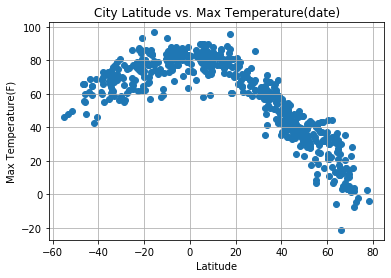

In [9]:
x = df['Lat']
y = df['Max Temp']
draw_scatter(x, y, 'City Latitude vs. Max Temperature(date)', 'Latitude', 'Max Temperature(F)', './output_data/fig1.png')

#### Latitude vs. Humidity Plot

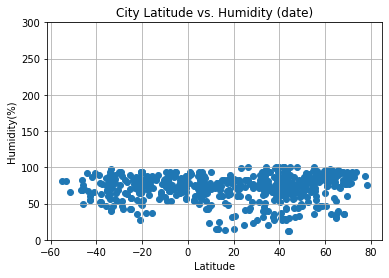

In [10]:
x = df['Lat']
y = df['Humidity']
draw_scatter(x, y, 'City Latitude vs. Humidity (date)', 'Latitude', 'Humidity(%)', "./output_data/fig2.png", (0,300))

**Latitude vs. Cloudiness Plot**

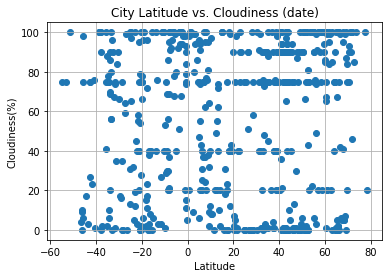

In [11]:
x = df['Lat']
y = df['Cloudiness']
draw_scatter(x, y, 'City Latitude vs. Cloudiness (date)', 'Latitude', 'Cloudiness(%)', "./output_data/fig3.png")

#### Latitude vs. Wind Speed Plot

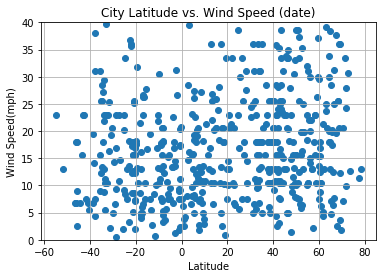

In [12]:
x = df['Lat']
y = df['Wind Speed'].apply(mps_to_mph)
draw_scatter(x, y, 'City Latitude vs. Wind Speed (date)', 'Latitude', 'Wind Speed(mph)', "./output_data/fig4.png", (0,40))

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def draw_scatter_with_linear_reg(x, y, title, xlabel, ylabel, savefn, ylimit=None):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    print(f'slope: {slope:.2f}, intercept: {intercept:.2f}')
    label = f'Y = {slope:.2f}X + {intercept:.2f}'
    print(f'The r-squared is:{r_value**2:.2f}')
    fig, ax = plt.subplots()
    ax.scatter(x,y)
    ax.plot(x, intercept + slope * x, 'r', label=label)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim(ylimit)
    ax.legend()
    ax.grid(True)
    fig.savefig(savefn)

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = df.loc[df['Lat'] >= 0]
southern_hemi_df = df.loc[df['Lat'] < 0]
northern_hemi_df.to_csv('./output_data/north_cities.csv', index=False)
southern_hemi_df.to_csv('./output_data/south_cities.csv', index=False)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

slope: -1.11, intercept: 92.33
The r-squared is:0.87


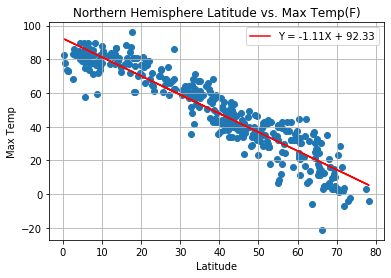

In [15]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
draw_scatter_with_linear_reg(x, y, 'Northern Hemisphere Latitude vs. Max Temp(F)', 'Latitude', 'Max Temp', "./output_data/fig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

slope: 0.53, intercept: 84.64
The r-squared is:0.47


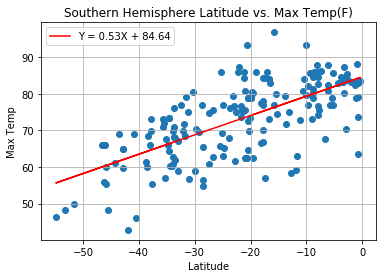

In [16]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
draw_scatter_with_linear_reg(x, y, 'Southern Hemisphere Latitude vs. Max Temp(F)', 'Latitude', 'Max Temp', "./output_data/fig6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

slope: 0.18, intercept: 64.18
The r-squared is:0.03


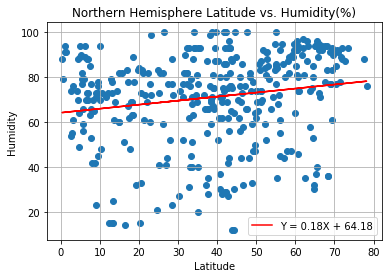

In [17]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
draw_scatter_with_linear_reg(x, y, 'Northern Hemisphere Latitude vs. Humidity(%)', 'Latitude', 'Humidity', './output_data/fig7.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

slope: 0.17, intercept: 76.56
The r-squared is:0.02


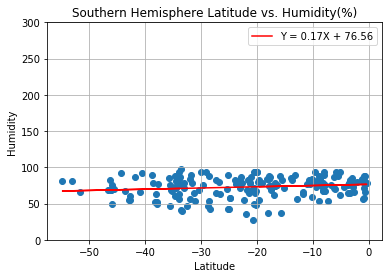

In [18]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
draw_scatter_with_linear_reg(x, y, 'Southern Hemisphere Latitude vs. Humidity(%)', 'Latitude', 'Humidity', './output_data/fig8.png', (0,300))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

slope: 0.14, intercept: 50.66
The r-squared is:0.01


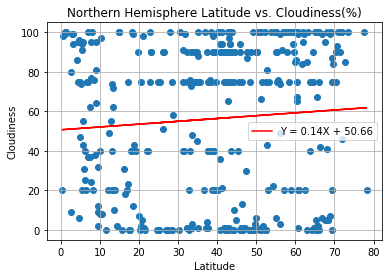

In [19]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
draw_scatter_with_linear_reg(x, y, 'Northern Hemisphere Latitude vs. Cloudiness(%)', 'Latitude', 'Cloudiness', './output_data/fig9.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

slope: 0.37, intercept: 62.89
The r-squared is:0.02


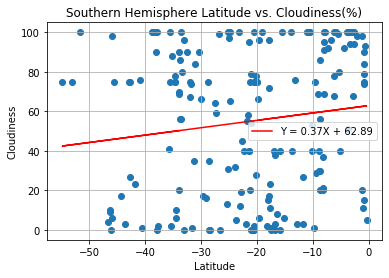

In [20]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
draw_scatter_with_linear_reg(x, y, 'Southern Hemisphere Latitude vs. Cloudiness(%)', 'Latitude', 'Cloudiness', './output_data/fig10.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

slope: 0.06, intercept: 6.60
The r-squared is:0.04


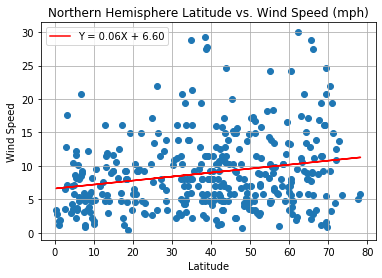

In [21]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
draw_scatter_with_linear_reg(x, y, 'Northern Hemisphere Latitude vs. Wind Speed (mph)', 'Latitude', 'Wind Speed', './output_data/fig11.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

slope: -0.06, intercept: 5.58
The r-squared is:0.04


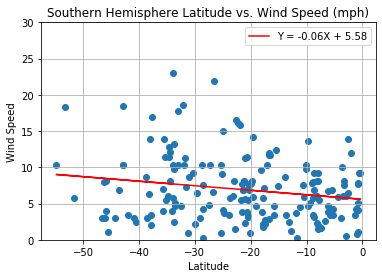

In [22]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
draw_scatter_with_linear_reg(x, y, 'Southern Hemisphere Latitude vs. Wind Speed (mph)', 'Latitude', 'Wind Speed', './output_data/fig12.png', (0,30))